### Name : Ayodya W.K.H
### Index Number : 190065K

The Middlebury Multi-View Stereo dataset contains calibrated image. Read the webpage and download the TempleSparseRing 1 dataset. </br>
<br>1. Read in the templeSR_par.txtg and populate the parameters of Ki Ri and ti for i = i,2.
<br>2. Compute the camera matrices Ki for i = i, 2.
<br>3. Plot the epipolar line corresponding to the point x = [130 115 1]T in image 1.
<br>4. Detect and plot the features (e.g., SIFT) and plot the corresponding epipolar lines.


### Question 1

In [14]:
import numpy as np 
import cv2 as cv

f = open(r'./templeSparseRing/templeSR_par.txt', 'r') 
assert f is not None 
n = int(f.readline()) 

# Reading the informaiton on the first image 
l = f.readline().split() 
im1_fn = l[0] 
K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3)) 
R1 = np. array([float(i) for i in l[10:19]]).reshape((3,3)) 
t1 = np.array([float(i) for i in l[19:22]]). reshape( (3,1)) 

# Reading the informaiton on the second image 
l= f.readline().split() 
im2_fn = l[0] 
K2 = np.array([float(i) for i in l[ 1:10]]).reshape((3,3)) 
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3)) 
t2 = np. array([float(i) for i in l[19:22]]).reshape((3,1))

# Read the two images and show 
im1 = cv.imread(r'./templeSparseRing/' + im1_fn, cv. IMREAD_COLOR) 
im2 = cv.imread(r'./templeSparseRing/' + im2_fn, cv. IMREAD_COLOR) 
assert im1 is not None 
assert im2 is not None   

#Compute P1 and P2 
P1 = K1 @ np.hstack ((R1, t1))  #P = K*[R|t] 
P2 = K2 @ np.hstack ((R2, t2))  #P = K*[R|t] 

print ('P1 =', P1) 

P1 = [[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]]


In [9]:
from scipy.linalg import null_space 

def skew(x): 
    x = x.ravel() 
    return np.array([[0, -x[2], x[1]], [x[2], 0, -x [0]], [-x[1], x[0], 0]]) 

C = null_space(P1) 
C = C * np.sign(C[0,0]) 
e2 = P2 @ C 
e2x = skew(e2) 
F = e2x @ P2 @ np.linalg.pinv(P1) 
print('F =', F) 

x = np.array ([130, 115, 1]) 
cv.circle(im1, (x[0], x[1]), 5, (0, 0, 255), -1) 
l2 = F@ x.T 
p1 = np.array([0, (l2[0]*0 + l2[2])/l2[1]]).astype(int) 
p2 = np.array([ 500, (l2[0]*500 + l2[2])/l2[1]]).astype(int) 
cv.line(im2, (p1[0], p1[1]), (p2[0] ,p2[1]),(255,0,0),5) 
                   
cv.namedWindow('Im') 
cv.imshow('Im', im1)  
cv.waitKey(0)
cv.imshow('Im', im2) 
cv.waitKey(0) 
cv.destroyAllWindows ()

F = [[-2.87071497e-04 -3.96261289e-02  2.94221686e+02]
 [-3.55039713e-02  1.65329260e-04  1.78860854e+01]
 [-2.76702814e+02  2.12942175e+01 -9.06669374e+03]]


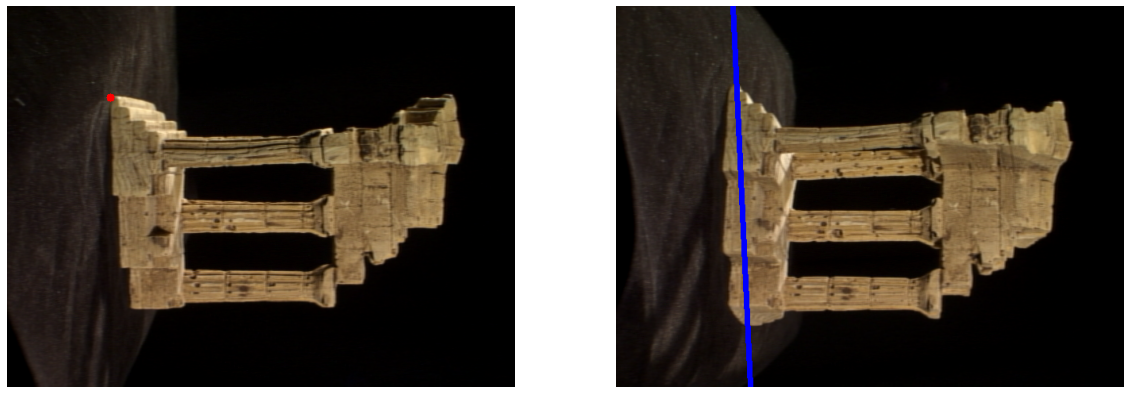

In [12]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1,2, figsize = (20,20))
axis[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
axis[1].axis('off')
plt.show()